# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [69]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [70]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [71]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Flew ATL to LHR 8th Jan 202...
1,Not Verified | Great thing about British Airw...
2,Not Verified | The staff are friendly. The pla...
3,✅ Trip Verified | Probably the worst business ...
4,"✅ Trip Verified | Definitely not recommended, ..."


In [72]:
df

,reviews
0,✅ Trip Verified | Flew ATL to LHR 8th Jan 202...
1,Not Verified | Great thing about British Airw...
2,Not Verified | The staff are friendly. The pla...
3,✅ Trip Verified | Probably the worst business ...
4,"✅ Trip Verified | Definitely not recommended, ..."
...,...
995,✅ Trip Verified | Naples to Gatwick. The onlin...
996,✅ Trip Verified | I have been flying with BA f...
997,✅ Trip Verified | I traveled on British Airway...
998,✅ Trip Verified | Flew British Airways from Bu...


In [73]:
df.reviews = df.reviews.str.split( "|",  expand=True)[1] #Split the trip verified portion

In [74]:
df

,reviews
0,Flew ATL to LHR 8th Jan 2023. Was unlucky en...
1,Great thing about British Airways A380 is th...
2,"The staff are friendly. The plane was cold, w..."
3,Probably the worst business class experience ...
4,"Definitely not recommended, especially for bu..."
...,...
995,Naples to Gatwick. The online check-in would ...
996,I have been flying with BA for the last 32 ye...
997,I traveled on British Airways with my wife fr...
998,Flew British Airways from Budapest to London ...


In [75]:
# PART 1: DATA CLEANING USING STOPWORDS REMOVAL & NLTK LIBRARIES

In [76]:
# Clean the dataset now

#Using stopwaords and NLTK to clean the dataset
import nltk.corpus
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
df['cleaned_reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
stop_words = stopwords.words("english") 
# apply the same code as above but assign
# a new column to see the differences
df['cleaned_reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [78]:
# PART 2: DATA CLEANING USING REGEX (RE) LIBRARIES

In [79]:
import re
# Define a function to clean the text using Regex as well
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['cleaned Reviews'] = df['reviews'].apply(clean)
del df['cleaned Reviews']
df.head()

,reviews,cleaned_reviews
0,Flew ATL to LHR 8th Jan 2023. Was unlucky en...,Flew ATL LHR 8th Jan 2023. Was unlucky enough ...
1,Great thing about British Airways A380 is th...,Great thing British Airways A380 economy secti...
2,"The staff are friendly. The plane was cold, w...","The staff friendly. The plane cold, shivering,..."
3,Probably the worst business class experience ...,Probably worst business class experience I've ...
4,"Definitely not recommended, especially for bu...","Definitely recommended, especially business cl..."


In [80]:
df

,reviews,cleaned_reviews
0,Flew ATL to LHR 8th Jan 2023. Was unlucky en...,Flew ATL LHR 8th Jan 2023. Was unlucky enough ...
1,Great thing about British Airways A380 is th...,Great thing British Airways A380 economy secti...
2,"The staff are friendly. The plane was cold, w...","The staff friendly. The plane cold, shivering,..."
3,Probably the worst business class experience ...,Probably worst business class experience I've ...
4,"Definitely not recommended, especially for bu...","Definitely recommended, especially business cl..."
...,...,...
995,Naples to Gatwick. The online check-in would ...,Naples Gatwick. The online check-in would work...
996,I have been flying with BA for the last 32 ye...,I flying BA last 32 years Sao Paulo London mos...
997,I traveled on British Airways with my wife fr...,"I traveled British Airways wife Dallas Lagos, ..."
998,Flew British Airways from Budapest to London ...,Flew British Airways Budapest London Heathrow....


In [83]:
# PART 3: DATA CLEANING USING PART OF SPEECH (POS) TAGGING 

In [85]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged speech'] = df['cleaned_reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Anura\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Anura\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,cleaned_reviews,POS tagged speech
0,Flew ATL to LHR 8th Jan 2023. Was unlucky en...,Flew ATL LHR 8th Jan 2023. Was unlucky enough ...,"[(Flew, n), (ATL, n), (LHR, n), (8th, None), (..."
1,Great thing about British Airways A380 is th...,Great thing British Airways A380 economy secti...,"[(Great, a), (thing, n), (British, a), (Airway..."
2,"The staff are friendly. The plane was cold, w...","The staff friendly. The plane cold, shivering,...","[(staff, n), (friendly, r), (., None), (plane,..."
3,Probably the worst business class experience ...,Probably worst business class experience I've ...,"[(Probably, r), (worst, a), (business, n), (cl..."
4,"Definitely not recommended, especially for bu...","Definitely recommended, especially business cl...","[(Definitely, r), (recommended, v), (,, None),..."


In [86]:
# PART 4: DATA CLEANING USING STEMMING AND LEMMATIZATION

In [87]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anura\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [89]:
# Obtaining the stem words – Lemmatization
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma speech'] = df['POS tagged speech'].apply(lemmatize)
df.head()

,reviews,cleaned_reviews,POS tagged speech,Lemma speech
0,Flew ATL to LHR 8th Jan 2023. Was unlucky en...,Flew ATL LHR 8th Jan 2023. Was unlucky enough ...,"[(Flew, n), (ATL, n), (LHR, n), (8th, None), (...",Flew ATL LHR 8th Jan 2023 . unlucky enough b...
1,Great thing about British Airways A380 is th...,Great thing British Airways A380 economy secti...,"[(Great, a), (thing, n), (British, a), (Airway...",Great thing British Airways A380 economy sec...
2,"The staff are friendly. The plane was cold, w...","The staff friendly. The plane cold, shivering,...","[(staff, n), (friendly, r), (., None), (plane,...","staff friendly . plane cold , shiver , give ..."
3,Probably the worst business class experience ...,Probably worst business class experience I've ...,"[(Probably, r), (worst, a), (business, n), (cl...",Probably bad business class experience 've e...
4,"Definitely not recommended, especially for bu...","Definitely recommended, especially business cl...","[(Definitely, r), (recommended, v), (,, None),...","Definitely recommend , especially business c..."


In [90]:
# Perform sentiment analysis  using VADER & NLP

In [91]:
!pip install vaderSentiment

In [101]:
# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# function to print sentiments of the sentence.
def sentiment_scores(sentence):
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    # polarity_scores method of SentimentIntensityAnalyzer object gives a sentiment dictionary 
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)

    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")

    print("Sentence Overall Rated As", end = " ")

    return sentiment_dict['compound']

df['Sentiment'] = df['Lemma speech'].apply(sentiment_scores)

def VADER_analysis(compound):
    sentiment_dict = sid_obj.polarity_scores(sentence)
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.5 :
        print("Positive")

    elif sentiment_dict['compound'] <= 0 :
        print("Negative") 

    else :
        print("Neutral")

df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df

Overall sentiment dictionary is :  {'neg': 0.146, 'neu': 0.818, 'pos': 0.036, 'compound': -0.9711}
sentence was rated as  14.6 % Negative
sentence was rated as  81.8 % Neutral
sentence was rated as  3.5999999999999996 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.099, 'neu': 0.715, 'pos': 0.186, 'compound': 0.91}
sentence was rated as  9.9 % Negative
sentence was rated as  71.5 % Neutral
sentence was rated as  18.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.059, 'neu': 0.842, 'pos': 0.099, 'compound': 0.5423}
sentence was rated as  5.8999999999999995 % Negative
sentence was rated as  84.2 % Neutral
sentence was rated as  9.9 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.1, 'neu': 0.882, 'pos': 0.018, 'compound': -0.9848}
sentence was rated as  10.0 % Negative
sentence was rated as  88.2 % Neutral
sentence was rated as  1.7999999999999998 % Positive
Sentence Overall Rated As Ov

sentence was rated as  75.8 % Neutral
sentence was rated as  17.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.159, 'neu': 0.781, 'pos': 0.06, 'compound': -0.9739}
sentence was rated as  15.9 % Negative
sentence was rated as  78.10000000000001 % Neutral
sentence was rated as  6.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.053, 'neu': 0.757, 'pos': 0.19, 'compound': 0.7184}
sentence was rated as  5.3 % Negative
sentence was rated as  75.7 % Neutral
sentence was rated as  19.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.039, 'neu': 0.73, 'pos': 0.231, 'compound': 0.9531}
sentence was rated as  3.9 % Negative
sentence was rated as  73.0 % Neutral
sentence was rated as  23.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.091, 'neu': 0.768, 'pos': 0.141, 'compound': 0.8555}
sentence was rated as  9.1 % Negative
sentence was rated as  76.8 % Neu

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.146, 'neu': 0.787, 'pos': 0.066, 'compound': -0.7263}
sentence was rated as  14.6 % Negative
sentence was rated as  78.7 % Neutral
sentence was rated as  6.6000000000000005 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.176, 'neu': 0.721, 'pos': 0.103, 'compound': -0.8491}
sentence was rated as  17.599999999999998 % Negative
sentence was rated as  72.1 % Neutral
sentence was rated as  10.299999999999999 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.027, 'neu': 0.86, 'pos': 0.112, 'compound': 0.9312}
sentence was rated as  2.7 % Negative
sentence was rated as  86.0 % Neutral
sentence was rated as  11.200000000000001 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.032, 'neu': 0.78, 'pos': 0.188, 'compound': 0.802}
sentence was rated as  3.2 % Negative
sentence was rated as  78.0 % Neutral
sentence was rated as  18.

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.169, 'neu': 0.757, 'pos': 0.074, 'compound': -0.936}
sentence was rated as  16.900000000000002 % Negative
sentence was rated as  75.7 % Neutral
sentence was rated as  7.3999999999999995 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.118, 'neu': 0.74, 'pos': 0.142, 'compound': 0.34}
sentence was rated as  11.799999999999999 % Negative
sentence was rated as  74.0 % Neutral
sentence was rated as  14.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compound': 0.5106}
sentence was rated as  0.0 % Negative
sentence was rated as  93.0 % Neutral
sentence was rated as  7.000000000000001 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.207, 'neu': 0.667, 'pos': 0.126, 'compound': -0.6908}
sentence was rated as  20.7 % Negative
sentence was rated as  66.7 % Neutral
sentence was rated as  12.6 % P

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.051, 'neu': 0.75, 'pos': 0.199, 'compound': 0.9451}
sentence was rated as  5.1 % Negative
sentence was rated as  75.0 % Neutral
sentence was rated as  19.900000000000002 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.072, 'neu': 0.574, 'pos': 0.354, 'compound': 0.9739}
sentence was rated as  7.199999999999999 % Negative
sentence was rated as  57.4 % Neutral
sentence was rated as  35.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.042, 'neu': 0.632, 'pos': 0.326, 'compound': 0.8439}
sentence was rated as  4.2 % Negative
sentence was rated as  63.2 % Neutral
sentence was rated as  32.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.235, 'neu': 0.765, 'pos': 0.0, 'compound': -0.9081}
sentence was rated as  23.5 % Negative
sentence was rated as  76.5 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall R

sentence was rated as  77.8 % Neutral
sentence was rated as  11.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.051, 'neu': 0.651, 'pos': 0.298, 'compound': 0.9904}
sentence was rated as  5.1 % Negative
sentence was rated as  65.10000000000001 % Neutral
sentence was rated as  29.799999999999997 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.082, 'neu': 0.772, 'pos': 0.145, 'compound': 0.8908}
sentence was rated as  8.200000000000001 % Negative
sentence was rated as  77.2 % Neutral
sentence was rated as  14.499999999999998 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.125, 'neu': 0.753, 'pos': 0.122, 'compound': 0.34}
sentence was rated as  12.5 % Negative
sentence was rated as  75.3 % Neutral
sentence was rated as  12.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.086, 'neu': 0.793, 'pos': 0.121, 'compound': 0.3818}
sentence was rated as  8.6 %

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.13, 'neu': 0.799, 'pos': 0.072, 'compound': -0.6106}
sentence was rated as  13.0 % Negative
sentence was rated as  79.9 % Neutral
sentence was rated as  7.199999999999999 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.108, 'neu': 0.791, 'pos': 0.101, 'compound': 0.1027}
sentence was rated as  10.8 % Negative
sentence was rated as  79.10000000000001 % Neutral
sentence was rated as  10.100000000000001 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.11, 'neu': 0.777, 'pos': 0.113, 'compound': 0.3217}
sentence was rated as  11.0 % Negative
sentence was rated as  77.7 % Neutral
sentence was rated as  11.3 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.024, 'neu': 0.848, 'pos': 0.127, 'compound': 0.8271}
sentence was rated as  2.4 % Negative
sentence was rated as  84.8 % Neutral
sentence was rated as  12.7 % Positive
Se

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.058, 'neu': 0.741, 'pos': 0.201, 'compound': 0.7149}
sentence was rated as  5.800000000000001 % Negative
sentence was rated as  74.1 % Neutral
sentence was rated as  20.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.038, 'neu': 0.676, 'pos': 0.286, 'compound': 0.9778}
sentence was rated as  3.8 % Negative
sentence was rated as  67.60000000000001 % Neutral
sentence was rated as  28.599999999999998 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.075, 'neu': 0.776, 'pos': 0.149, 'compound': 0.3612}
sentence was rated as  7.5 % Negative
sentence was rated as  77.60000000000001 % Neutral
sentence was rated as  14.899999999999999 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.06, 'neu': 0.656, 'pos': 0.284, 'compound': 0.9983}
sentence was rated as  6.0 % Negative
sentence was rated as  65.60000000000001 % Neutral
sen

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.124, 'neu': 0.674, 'pos': 0.202, 'compound': 0.4186}
sentence was rated as  12.4 % Negative
sentence was rated as  67.4 % Neutral
sentence was rated as  20.200000000000003 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.248, 'neu': 0.679, 'pos': 0.073, 'compound': -0.7717}
sentence was rated as  24.8 % Negative
sentence was rated as  67.9 % Neutral
sentence was rated as  7.3 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.082, 'neu': 0.8, 'pos': 0.118, 'compound': 0.4767}
sentence was rated as  8.200000000000001 % Negative
sentence was rated as  80.0 % Neutral
sentence was rated as  11.799999999999999 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.342, 'neu': 0.594, 'pos': 0.064, 'compound': -0.8936}
sentence was rated as  34.2 % Negative
sentence was rated as  59.4 % Neutral
sentence was rated as  6.4 % Positive
S

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.214, 'neu': 0.786, 'pos': 0.0, 'compound': -0.5994}
sentence was rated as  21.4 % Negative
sentence was rated as  78.60000000000001 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.021, 'neu': 0.679, 'pos': 0.3, 'compound': 0.9875}
sentence was rated as  2.1 % Negative
sentence was rated as  67.9 % Neutral
sentence was rated as  30.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.9789}
sentence was rated as  0.0 % Negative
sentence was rated as  78.3 % Neutral
sentence was rated as  21.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.086, 'neu': 0.771, 'pos': 0.143, 'compound': 0.8809}
sentence was rated as  8.6 % Negative
sentence was rated as  77.10000000000001 % Neutral
sentence was rated as  14.299999999999999 % Positive
Sentence 

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'compound': 0.9153}
sentence was rated as  0.0 % Negative
sentence was rated as  71.7 % Neutral
sentence was rated as  28.299999999999997 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.158, 'neu': 0.732, 'pos': 0.11, 'compound': -0.4939}
sentence was rated as  15.8 % Negative
sentence was rated as  73.2 % Neutral
sentence was rated as  11.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.059, 'neu': 0.8, 'pos': 0.141, 'compound': 0.5423}
sentence was rated as  5.8999999999999995 % Negative
sentence was rated as  80.0 % Neutral
sentence was rated as  14.099999999999998 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.1, 'neu': 0.742, 'pos': 0.158, 'compound': 0.6486}
sentence was rated as  10.0 % Negative
sentence was rated as  74.2 % Neutral
sentence was rated as  15.8 % Positive
Sente

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.9844}
sentence was rated as  0.0 % Negative
sentence was rated as  66.2 % Neutral
sentence was rated as  33.800000000000004 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.368, 'neu': 0.595, 'pos': 0.037, 'compound': -0.9578}
sentence was rated as  36.8 % Negative
sentence was rated as  59.5 % Neutral
sentence was rated as  3.6999999999999997 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.051, 'neu': 0.759, 'pos': 0.19, 'compound': 0.7579}
sentence was rated as  5.1 % Negative
sentence was rated as  75.9 % Neutral
sentence was rated as  19.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.103, 'neu': 0.611, 'pos': 0.287, 'compound': 0.9334}
sentence was rated as  10.299999999999999 % Negative
sentence was rated as  61.1 % Neutral
sentence was rated as  28.7 % Positive
Se

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.15, 'neu': 0.739, 'pos': 0.111, 'compound': -0.5736}
sentence was rated as  15.0 % Negative
sentence was rated as  73.9 % Neutral
sentence was rated as  11.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.154, 'neu': 0.826, 'pos': 0.02, 'compound': -0.9925}
sentence was rated as  15.4 % Negative
sentence was rated as  82.6 % Neutral
sentence was rated as  2.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.106, 'neu': 0.839, 'pos': 0.055, 'compound': -0.5594}
sentence was rated as  10.6 % Negative
sentence was rated as  83.89999999999999 % Neutral
sentence was rated as  5.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.191, 'neu': 0.598, 'pos': 0.211, 'compound': 0.5888}
sentence was rated as  19.1 % Negative
sentence was rated as  59.8 % Neutral
sentence was rated as  21.099999999999998 % Positive
Sentence Overa

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.131, 'neu': 0.801, 'pos': 0.068, 'compound': -0.5725}
sentence was rated as  13.100000000000001 % Negative
sentence was rated as  80.10000000000001 % Neutral
sentence was rated as  6.800000000000001 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.912, 'pos': 0.088, 'compound': 0.5859}
sentence was rated as  0.0 % Negative
sentence was rated as  91.2 % Neutral
sentence was rated as  8.799999999999999 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.09, 'neu': 0.881, 'pos': 0.029, 'compound': -0.7606}
sentence was rated as  9.0 % Negative
sentence was rated as  88.1 % Neutral
sentence was rated as  2.9000000000000004 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.158, 'neu': 0.758, 'pos': 0.084, 'compound': -0.813}
sentence was rated as  15.8 % Negative
sentence was rated as  75.8 % Neutral
sentence was ra

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.158, 'neu': 0.701, 'pos': 0.14, 'compound': -0.1779}
sentence was rated as  15.8 % Negative
sentence was rated as  70.1 % Neutral
sentence was rated as  14.000000000000002 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.069, 'neu': 0.764, 'pos': 0.168, 'compound': 0.9561}
sentence was rated as  6.9 % Negative
sentence was rated as  76.4 % Neutral
sentence was rated as  16.8 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.11, 'neu': 0.678, 'pos': 0.212, 'compound': 0.6166}
sentence was rated as  11.0 % Negative
sentence was rated as  67.80000000000001 % Neutral
sentence was rated as  21.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.105, 'neu': 0.773, 'pos': 0.122, 'compound': 0.7669}
sentence was rated as  10.5 % Negative
sentence was rated as  77.3 % Neutral
sentence was rated as  12.2 % Positive
Sentence Overal

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.037, 'neu': 0.594, 'pos': 0.37, 'compound': 0.9678}
sentence was rated as  3.6999999999999997 % Negative
sentence was rated as  59.4 % Neutral
sentence was rated as  37.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.04, 'neu': 0.846, 'pos': 0.114, 'compound': 0.5423}
sentence was rated as  4.0 % Negative
sentence was rated as  84.6 % Neutral
sentence was rated as  11.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.073, 'neu': 0.57, 'pos': 0.356, 'compound': 0.9729}
sentence was rated as  7.3 % Negative
sentence was rated as  56.99999999999999 % Neutral
sentence was rated as  35.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.117, 'neu': 0.682, 'pos': 0.201, 'compound': 0.7269}
sentence was rated as  11.700000000000001 % Negative
sentence was rated as  68.2 % Neutral
sentence was rated as  20.1 % Positive
Sent

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.102, 'neu': 0.77, 'pos': 0.128, 'compound': 0.5423}
sentence was rated as  10.2 % Negative
sentence was rated as  77.0 % Neutral
sentence was rated as  12.8 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.036, 'neu': 0.644, 'pos': 0.32, 'compound': 0.9712}
sentence was rated as  3.5999999999999996 % Negative
sentence was rated as  64.4 % Neutral
sentence was rated as  32.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.388, 'pos': 0.612, 'compound': 0.9661}
sentence was rated as  0.0 % Negative
sentence was rated as  38.800000000000004 % Neutral
sentence was rated as  61.199999999999996 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.073, 'neu': 0.875, 'pos': 0.052, 'compound': -0.1779}
sentence was rated as  7.3 % Negative
sentence was rated as  87.5 % Neutral
sentence was rated as  5.2 % Positive
Sent

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.033, 'neu': 0.934, 'pos': 0.034, 'compound': 0.0258}
sentence was rated as  3.3000000000000003 % Negative
sentence was rated as  93.4 % Neutral
sentence was rated as  3.4000000000000004 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.091, 'neu': 0.737, 'pos': 0.172, 'compound': 0.8912}
sentence was rated as  9.1 % Negative
sentence was rated as  73.7 % Neutral
sentence was rated as  17.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.117, 'neu': 0.883, 'pos': 0.0, 'compound': -0.8667}
sentence was rated as  11.700000000000001 % Negative
sentence was rated as  88.3 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.118, 'neu': 0.823, 'pos': 0.059, 'compound': -0.8271}
sentence was rated as  11.799999999999999 % Negative
sentence was rated as  82.3 % Neutral
sentence was rated as  5.

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.084, 'neu': 0.717, 'pos': 0.199, 'compound': 0.9313}
sentence was rated as  8.4 % Negative
sentence was rated as  71.7 % Neutral
sentence was rated as  19.900000000000002 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.163, 'neu': 0.797, 'pos': 0.04, 'compound': -0.766}
sentence was rated as  16.3 % Negative
sentence was rated as  79.7 % Neutral
sentence was rated as  4.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.089, 'neu': 0.758, 'pos': 0.153, 'compound': 0.4939}
sentence was rated as  8.9 % Negative
sentence was rated as  75.8 % Neutral
sentence was rated as  15.299999999999999 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.021, 'neu': 0.529, 'pos': 0.45, 'compound': 0.9933}
sentence was rated as  2.1 % Negative
sentence was rated as  52.900000000000006 % Neutral
sentence was rated as  45.0 % Positive
Sent

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.109, 'neu': 0.788, 'pos': 0.103, 'compound': 0.079}
sentence was rated as  10.9 % Negative
sentence was rated as  78.8 % Neutral
sentence was rated as  10.299999999999999 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.211, 'neu': 0.733, 'pos': 0.056, 'compound': -0.796}
sentence was rated as  21.099999999999998 % Negative
sentence was rated as  73.3 % Neutral
sentence was rated as  5.6000000000000005 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.088, 'neu': 0.661, 'pos': 0.251, 'compound': 0.9703}
sentence was rated as  8.799999999999999 % Negative
sentence was rated as  66.10000000000001 % Neutral
sentence was rated as  25.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.098, 'neu': 0.776, 'pos': 0.126, 'compound': 0.1779}
sentence was rated as  9.8 % Negative
sentence was rated as  77.60000000000001 % Neutral


Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.092, 'neu': 0.682, 'pos': 0.226, 'compound': 0.9776}
sentence was rated as  9.2 % Negative
sentence was rated as  68.2 % Neutral
sentence was rated as  22.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.015, 'neu': 0.701, 'pos': 0.283, 'compound': 0.9942}
sentence was rated as  1.5 % Negative
sentence was rated as  70.1 % Neutral
sentence was rated as  28.299999999999997 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.134, 'neu': 0.655, 'pos': 0.211, 'compound': 0.8316}
sentence was rated as  13.4 % Negative
sentence was rated as  65.5 % Neutral
sentence was rated as  21.099999999999998 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.145, 'neu': 0.756, 'pos': 0.099, 'compound': -0.3732}
sentence was rated as  14.499999999999998 % Negative
sentence was rated as  75.6 % Neutral
sentence was rated as  9.9 % Positive


sentence was rated as  11.3 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.011, 'neu': 0.713, 'pos': 0.276, 'compound': 0.9851}
sentence was rated as  1.0999999999999999 % Negative
sentence was rated as  71.3 % Neutral
sentence was rated as  27.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.082, 'neu': 0.868, 'pos': 0.05, 'compound': -0.7841}
sentence was rated as  8.200000000000001 % Negative
sentence was rated as  86.8 % Neutral
sentence was rated as  5.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.074, 'neu': 0.794, 'pos': 0.132, 'compound': 0.6837}
sentence was rated as  7.3999999999999995 % Negative
sentence was rated as  79.4 % Neutral
sentence was rated as  13.200000000000001 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.041, 'neu': 0.77, 'pos': 0.189, 'compound': 0.9858}
sentence was rated as  4.1000000000000005 % Negative
sentence wa

sentence was rated as  18.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.206, 'neu': 0.761, 'pos': 0.033, 'compound': -0.9274}
sentence was rated as  20.599999999999998 % Negative
sentence was rated as  76.1 % Neutral
sentence was rated as  3.3000000000000003 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compound': 0.9531}
sentence was rated as  0.0 % Negative
sentence was rated as  63.0 % Neutral
sentence was rated as  37.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.111, 'neu': 0.798, 'pos': 0.091, 'compound': -0.4588}
sentence was rated as  11.1 % Negative
sentence was rated as  79.80000000000001 % Neutral
sentence was rated as  9.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.097, 'neu': 0.726, 'pos': 0.177, 'compound': 0.8824}
sentence was rated as  9.700000000000001 % Negative
sentence was rated as  72.6 

,reviews,cleaned_reviews,POS tagged speech,Lemma speech,Sentiment,Analysis,Sentiment Analysis
0,Flew ATL to LHR 8th Jan 2023. Was unlucky en...,Flew ATL LHR 8th Jan 2023. Was unlucky enough ...,"[(Flew, n), (ATL, n), (LHR, n), (8th, None), (...",Flew ATL LHR 8th Jan 2023 . unlucky enough b...,-0.9711,Negative,Negative
1,Great thing about British Airways A380 is th...,Great thing British Airways A380 economy secti...,"[(Great, a), (thing, n), (British, a), (Airway...",Great thing British Airways A380 economy sec...,0.9100,Positive,Positive
2,"The staff are friendly. The plane was cold, w...","The staff friendly. The plane cold, shivering,...","[(staff, n), (friendly, r), (., None), (plane,...","staff friendly . plane cold , shiver , give ...",0.5423,Positive,Positive
3,Probably the worst business class experience ...,Probably worst business class experience I've ...,"[(Probably, r), (worst, a), (business, n), (cl...",Probably bad business class experience 've e...,-0.9848,Negative,Negative
4,"Definitely not recommended, especially for bu...","Definitely recommended, especially business cl...","[(Definitely, r), (recommended, v), (,, None),...","Definitely recommend , especially business c...",0.8519,Positive,Positive
...,...,...,...,...,...,...,...
995,Naples to Gatwick. The online check-in would ...,Naples Gatwick. The online check-in would work...,"[(Naples, n), (Gatwick, n), (., None), (online...",Naples Gatwick . online check-in would work ...,-0.4835,Negative,Negative
996,I have been flying with BA for the last 32 ye...,I flying BA last 32 years Sao Paulo London mos...,"[(flying, v), (BA, n), (last, a), (32, None), ...",fly BA last 32 year Sao Paulo London mostly ...,-0.9129,Negative,Negative
997,I traveled on British Airways with my wife fr...,"I traveled British Airways wife Dallas Lagos, ...","[(traveled, v), (British, a), (Airways, n), (w...","travel British Airways wife Dallas Lagos , N...",-0.8820,Negative,Negative
998,Flew British Airways from Budapest to London ...,Flew British Airways Budapest London Heathrow....,"[(Flew, n), (British, n), (Airways, n), (Budap...",Flew British Airways Budapest London Heathro...,0.9425,Positive,Positive


In [102]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    534
Negative    348
Neutral     118
Name: Analysis, dtype: int64

In [103]:
# Data Visualization 

([<matplotlib.patches.Wedge at 0x243926d8760>,
 [Text(-0.11727219924988312, 1.0937308769908143, 'Positive'),
  Text(-0.2869258271329552, -1.0619197567255587, 'Negative'),
  Text(1.258295909139194, -0.48907198349892095, 'Neutral')],
 [Text(-0.06396665413629989, 0.5965804783586259, '53.4%'),
  Text(-0.15650499661797554, -0.579228958213941, '34.8%'),
  Text(0.792260387235789, -0.3079342118326539, '11.8%')])

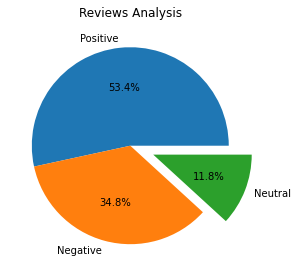

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis") 
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

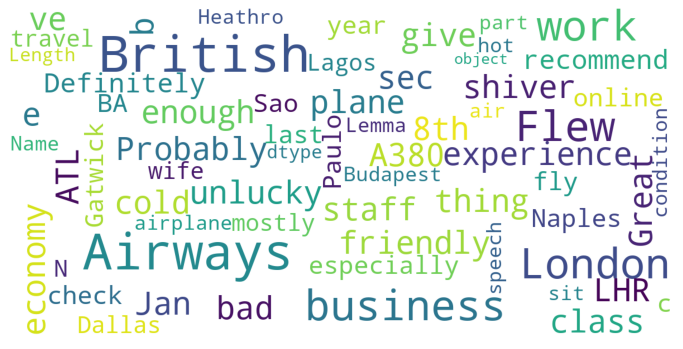

In [108]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['Lemma speech'])

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.